In [3]:
import gc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
# import seaborn as sns
import sklearn
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.decomposition import PCA
# import plotly.plotly as py
# import plotly.graph_objs as go

In [92]:
with open('expression_sensitivity.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    [all_data] = pickle.load(f)

In [71]:
all_data.to_csv('expression_sensitivity.csv')

In [25]:
n_feats = 22843

In [48]:
drug_data = all_data.iloc[:,n_feats:]

In [67]:
#drugs with greatest variation in sensitivity with the greatest number of points
drug_stats = pd.DataFrame()
drug_stats['std_dev'] = drug_data.std()
drug_stats['n_samples'] = drug_data.shape[0]-drug_data.isna().sum()

In [66]:
drugs_to_pred = ['Trametinib (GSK1120212)','Selumetinib (AZD6244)','Tivozanib (AV-951)','KI20227','Dasatinib']

In [69]:
drug_stats.sort_values(by='std_dev',ascending=False)

,std_dev,n_samples
Venetoclax,71.091694,186
Panobinostat,69.893501,128
Trametinib (GSK1120212),64.854224,299
Selumetinib (AZD6244),63.830559,287
Tivozanib (AV-951),61.188227,284
JNJ-28312141,59.888794,279
KI20227,58.654778,284
Dasatinib,58.592302,311
Flavopiridol,58.503910,288
PD173955,56.788491,292


In [3]:
sex = pd.DataFrame()
sex['gender'] = ['male','female']
sex['percent'] = [55.34,44.66]
sex['number'] = [311,251]

In [7]:
ethnicity = pd.read_csv('dems.csv')
ethnicity = ethnicity.T
ethnicity['Number'] = ethnicity.iloc[:,0].apply(lambda x: int(x.split(" ")[0]))
ethnicity['Percent'] = ethnicity.iloc[:,0].apply(lambda x: float(x.split(" ")[1].split("(")[1].split(")")[0]))
ethnicity.drop([0],axis=1,inplace=True)

In [21]:
with open('ethnicity.pkl', 'wb') as f:
    pickle.dump([ethnicity], f, protocol=2)

In [4]:
all_data.to_csv("all_data.csv")

In [5]:
from sklearn.linear_model import ElasticNet

In [5]:
n_lays=[3,5,7,10]

array([ 2.        ,  4.66666667,  7.33333333, 10.        ])

In [43]:
supplementary = pd.read_excel("Supplementary_Tables.xlsx", sheet_name = ['Table S11-Drug Families'])

In [ ]:
drug_response = supplementary['Table S10-Drug Responses']

In [ ]:
gene_rpkm = supplementary['Table S8-Gene Counts RPKM']
gene_mut = supplementary['Table S11-Gene Counts RPKM']

In [50]:
aml_types = supplementary['Table S3-Specific Diagnoses']

aml_types = aml_types.iloc[4:39,0:2]

aml_types['Number'] = aml_types['Unnamed: 1'].apply(lambda x: int(x.split(" ")[0]))

aml_types['Percent'] = aml_types['Unnamed: 1'].apply(lambda x: float(x.split(" ")[1].split("(")[1].split(")")[0]))

aml_types.drop(['Unnamed: 1'],axis=1,inplace=True)

In [59]:
with open('aml_types.pkl', 'wb') as f:
    pickle.dump([aml_types], f, protocol=2)

In [63]:
list(aml_types['Percent'])

[22.74,
 20.78,
 12.26,
 7.28,
 5.51,
 4.8,
 3.91,
 3.37,
 2.13,
 1.95,
 1.78,
 1.78,
 1.6,
 1.42,
 1.24,
 1.07,
 0.71,
 0.71,
 0.71,
 0.53,
 0.53,
 0.53,
 0.36,
 0.36,
 0.18,
 0.18,
 0.18,
 0.18,
 0.18,
 0.18,
 0.18,
 0.18,
 0.18,
 0.18,
 0.18]

In [44]:
gene_family = supplementary['Table S11-Drug Families']

In [45]:
#dict of families per drug
gene_family_dict = (gene_family.groupby('inhibitor')
       .apply(lambda x: list(x['family'])).to_dict())

In [46]:
gene_family_dict

{'A-674563': ['PKC', 'AKT', 'PI3K_AKT_MTOR'],
 'AT7519': ['CDK4_6', 'pan_CDK'],
 'AZD1480': ['JAK', 'RTK_NTRK', 'BTK_TEC'],
 'Afatinib (BIBW-2992)': ['RTK_ERBB'],
 'Alisertib (MLN8237)': ['AURK'],
 'Axitinib (AG-013736)': ['RTK_VEGFRs', 'RTK_TYPE_III'],
 'BEZ235': ['PI3K_MTOR', 'PI3K_AKT_MTOR'],
 'BI-2536': ['PLK'],
 'BMS-345541': ['IkK', 'pan_CDK'],
 'Barasertib (AZD1152-HQPA)': ['AURK', 'RTK_TYPE_III', 'BTK_TEC'],
 'Bortezomib (Velcade)': ['proteasome'],
 'Bosutinib (SKI-606)': ['SFKs', 'ABL', 'BTK_TEC'],
 'CHIR-99021': ['GSK3'],
 'CI-1040 (PD184352)': ['MEK', 'RAF_MEK_ERK'],
 'CYT387': ['JAK'],
 'Cabozantinib': ['RTK_TIE',
  'RTK_RET',
  'RTK_VEGFRs',
  'RTK_ALK_MET',
  'RTK_TAM',
  'RTK_TYPE_III'],
 'Canertinib (CI-1033)': ['RTK_ERBB'],
 'Cediranib (AZD2171)': ['RTK_VEGFRs', 'RTK_TYPE_III'],
 'Crenolanib': ['RTK_TYPE_III'],
 'Crizotinib (PF-2341066)': ['RTK_NTRK', 'RTK_ALK_MET', 'RTK_TAM'],
 'Dasatinib': ['SFKs', 'ABL', 'RTK_TYPE_III', 'RTK_EPH', 'BTK_TEC'],
 'Doramapimod (BIRB 796

In [47]:
#dict of families per drug
family_gene_dict = (gene_family.groupby('family')
       .apply(lambda x: list(x['inhibitor'])).to_dict())

In [34]:
family_gene_dict

{'ABL': ['Bosutinib (SKI-606)',
  'Dasatinib',
  'Imatinib',
  'Nilotinib',
  'PD173955',
  'Ponatinib (AP24534)'],
 'AKT': ['A-674563', 'GSK690693', 'MK-2206'],
 'ATM': ['KU-55933'],
 'AURK': ['Alisertib (MLN8237)',
  'Barasertib (AZD1152-HQPA)',
  'JNJ-7706621',
  'KW-2449',
  'MLN8054',
  'Tozasertib (VX-680)'],
 'BCL2': ['Venetoclax'],
 'BRD4': ['JQ1'],
 'BTK_TEC': ['AZD1480',
  'Barasertib (AZD1152-HQPA)',
  'Bosutinib (SKI-606)',
  'Dasatinib',
  'Foretinib (XL880)',
  'Ibrutinib (PCI-32765)',
  'KW-2449',
  'Lestaurtinib (CEP-701)',
  'NVP-TAE684',
  'Neratinib (HKI-272)',
  'PD173955',
  'TG101348',
  'Vandetanib (ZD6474)'],
 'CAMK': ['STO609'],
 'CDK4_6': ['AT7519', 'Flavopiridol', 'Palbociclib'],
 'FAKs': ['NVP-TAE684'],
 'GSK3': ['CHIR-99021'],
 'HDAC': ['Panobinostat'],
 'IkK': ['BMS-345541', 'MLN120B', 'NF-kB Activation Inhibitor'],
 'JAK': ['AZD1480',
  'CYT387',
  'JAK Inhibitor I',
  'Midostaurin',
  'Ruxolitinib (INCB018424)',
  'TG101348',
  'Tofacitinib (CP-690550)']

In [48]:
len(family_gene_dict)

39

In [49]:
with open('family_gene_dict.pkl', 'wb') as f:
    pickle.dump([family_gene_dict], f, protocol=2)

### Gene family info set

### Putting together gene expression set

In [9]:
gene_rpkm.head()

,Gene,Symbol,12-00023,12-00051,12-00066,12-00150,12-00211,12-00258,12-00294,12-00372,...,16-01216,16-01219,16-01223,16-01225,16-01227,16-01237,16-01254,16-01262,16-01270,16-01272
0,ENSG00000000003,TSPAN6,-1.562506,2.352541,-2.825696,1.688537,-3.272121,-3.561056,-3.287483,-0.149916,...,-0.382494,-1.896718,1.435855,-0.534799,0.509947,-0.830946,-2.923977,-0.998217,-0.964051,-1.042746
1,ENSG00000000419,DPM1,6.886609,6.438417,6.554495,6.852558,6.613863,7.045231,7.019496,6.698076,...,7.203169,6.885383,7.166459,7.174516,6.500557,7.545959,6.882087,7.331555,6.254707,6.641892
2,ENSG00000000457,SCYL3,3.817626,3.987133,3.207921,3.878230,4.528385,3.762908,4.514343,4.226222,...,3.611346,3.871390,3.992470,3.648833,4.503911,3.148649,4.077574,3.734620,3.811903,3.235035
3,ENSG00000000460,C1orf112,2.437114,1.862662,3.368360,3.332284,2.984168,2.964634,3.479539,2.549459,...,2.245470,3.677613,2.523557,3.235564,3.197705,2.645294,3.115359,2.980670,2.670554,3.341608
4,ENSG00000000938,FGR,10.131911,5.014124,10.139119,5.941063,7.274613,10.538451,8.762846,8.009340,...,9.715398,4.877051,6.218219,4.355385,5.746346,6.857559,10.782979,6.045946,6.383498,9.366073


In [10]:
print('{0} genes, {1} cell lines'.format(gene_rpkm.shape[0], gene_rpkm.shape[1]-2))

22843 genes, 451 cell lines


In [11]:
gene_rpkm.drop(labels='Gene',axis=1,inplace=True)
gene_rpkm.set_index('Symbol',inplace=True)

In [12]:
gene_exp = gene_rpkm.transpose()

In [13]:
gene_exp.head()

Symbol,TSPAN6,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,STPG1,...,RP11-218F10.3,RP11-686O6.2,RP11-313P22.1,RP11-548H3.1,RP11-102N12.3,RP11-196O16.1,RP4-671G15.2,RP11-731C17.2,RP4-621B10.8,RP11-114I8.4
12-00023,-1.562506,6.886609,3.817626,2.437114,10.131911,1.808987,6.629013,4.506795,6.311961,1.305681,...,1.750390,1.924608,0.064702,3.240346,0.688793,-0.219722,-1.997200,2.230568,-0.633602,0.279923
12-00051,2.352541,6.438417,3.987133,1.862662,5.014124,0.979265,5.681544,4.660312,4.850069,0.873389,...,0.274336,-1.344744,-1.374691,4.051967,-0.165863,0.676291,-0.485151,1.029501,-1.905383,2.397719
12-00066,-2.825696,6.554495,3.207921,3.368360,10.139119,2.148488,6.223989,4.912694,6.290280,1.475002,...,1.954098,-0.537617,0.477504,3.030349,-0.537617,0.518714,-0.805189,2.683986,-2.185010,1.871256
12-00150,1.688537,6.852558,3.878230,3.332284,5.941063,2.953542,6.995513,4.746799,5.320093,2.825116,...,0.405597,1.748546,0.010213,2.723531,2.431630,2.618279,-3.145493,1.676374,-3.561056,0.217633
12-00211,-3.272121,6.613863,4.528385,2.984168,7.274613,0.786802,6.506518,5.154787,6.552361,2.044008,...,2.809881,1.015917,0.566154,3.105811,-0.811042,1.581949,-0.206438,2.879371,0.847544,3.125748


In [14]:
print('{0} cell lines, {1} genes'.format(gene_exp.shape[0], gene_exp.shape[1]))

451 cell lines, 22843 genes


### Putting together drug responses 

In [15]:
drug_response

,inhibitor,lab_id,ic50,auc
0,17-AAG (Tanespimycin),12-00211,10.000000,225.918025
1,17-AAG (Tanespimycin),12-00219,0.276661,135.264409
2,17-AAG (Tanespimycin),12-00258,2.722845,164.561227
3,17-AAG (Tanespimycin),12-00262,0.123136,111.555971
4,17-AAG (Tanespimycin),12-00268,10.000000,226.805281
5,17-AAG (Tanespimycin),12-00288,0.181791,113.420242
6,17-AAG (Tanespimycin),12-00294,0.116582,107.719647
7,17-AAG (Tanespimycin),12-00301,0.535294,158.134640
8,17-AAG (Tanespimycin),12-00372,1.890073,173.025754
9,17-AAG (Tanespimycin),12-00423,0.390419,144.735347


In [16]:
print('{0} drugs tested'.format(len(drug_response.inhibitor.unique())))

122 drugs tested


In [17]:
tests_per_drug = drug_response.groupby("inhibitor").count()['lab_id']
tests_per_drug #not all have responses for all 421 cell lines

inhibitor
17-AAG (Tanespimycin)        421
A-674563                     438
ABT-737                      312
AT7519                       420
AZD1480                      428
Afatinib (BIBW-2992)         434
Alisertib (MLN8237)          436
Axitinib (AG-013736)         488
BEZ235                       423
BI-2536                      150
BMS-345541                   433
Barasertib (AZD1152-HQPA)    433
Bay 11-7085                  283
Bortezomib (Velcade)         448
Bosutinib (SKI-606)          436
CHIR-99021                   428
CI-1040 (PD184352)           434
CYT387                       434
Cabozantinib                 421
Canertinib (CI-1033)         431
Cediranib (AZD2171)          433
Crenolanib                   439
Crizotinib (PF-2341066)      495
DBZ                          309
Dasatinib                    500
Doramapimod (BIRB 796)       432
Dovitinib (CHIR-258)         434
Elesclomol                   401
Entospletinib (GS-9973)      239
Entrectinib                  112


In [18]:
dfs = []
drugs = drug_response.inhibitor.unique()
for drug in drugs:
    df = drug_response.loc[drug_response["inhibitor"] == drug]
    df.rename(columns={"auc": drug},inplace=True)
    df.set_index('lab_id',inplace=True)
    dfs.append(pd.DataFrame(df[drug]))

/Users/ssreedhar/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [19]:
all_drugs = pd.concat(dfs,axis=1,join='outer') #outer to keep both sides

/Users/ssreedhar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [20]:
all_drugs.shape[0]-all_drugs['ABT-737'].isna().sum() #number vals we have - ay looks correct
#all_drugs gives us responses for each drug & each 

312

### Combine drug response data w gene expression data and hope theres some overlap

In [1]:
#one df of all gene exp and all drug sensitivity vals
all_data = pd.concat([gene_exp,all_drugs],axis = 1,join_axes=[gene_exp.index])

NameError: name 'pd' is not defined

In [22]:
all_data

,TSPAN6,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,STPG1,...,VX-745,Vandetanib (ZD6474),Vargetef,Vatalanib (PTK787),Vemurafenib (PLX-4032),Venetoclax,Vismodegib (GDC-0449),Volasertib (BI-6727),XAV-939,YM-155
12-00023,-1.562506,6.886609,3.817626,2.437114,10.131911,1.808987,6.629013,4.506795,6.311961,1.305681,...,250.197553,228.466844,220.016127,260.929018,NaN,NaN,NaN,NaN,NaN,281.582971
12-00051,2.352541,6.438417,3.987133,1.862662,5.014124,0.979265,5.681544,4.660312,4.850069,0.873389,...,212.303770,157.817539,227.797541,206.763063,NaN,NaN,NaN,NaN,NaN,277.755934
12-00066,-2.825696,6.554495,3.207921,3.368360,10.139119,2.148488,6.223989,4.912694,6.290280,1.475002,...,107.130496,204.048488,107.243715,189.469042,NaN,NaN,NaN,NaN,NaN,211.975259
12-00150,1.688537,6.852558,3.878230,3.332284,5.941063,2.953542,6.995513,4.746799,5.320093,2.825116,...,234.260841,171.028575,166.898934,196.513251,NaN,NaN,NaN,NaN,NaN,228.902695
12-00211,-3.272121,6.613863,4.528385,2.984168,7.274613,0.786802,6.506518,5.154787,6.552361,2.044008,...,229.496106,281.448904,266.318413,200.239127,NaN,NaN,272.847735,NaN,223.687277,242.984849
12-00258,-3.561056,7.045231,3.762908,2.964634,10.538451,4.636939,5.673199,4.836415,6.056817,1.873819,...,206.411780,262.574406,278.220515,248.676066,NaN,NaN,286.274000,NaN,272.063465,280.508046
12-00294,-3.287483,7.019496,4.514343,3.479539,8.762846,0.572802,5.732546,4.795887,6.155323,1.619544,...,154.658062,210.225216,116.427819,178.935876,NaN,NaN,286.274000,NaN,218.783591,282.815470
12-00372,-0.149916,6.698076,4.226222,2.549459,8.009340,6.439783,5.799692,4.950827,6.632834,2.013097,...,270.542445,169.149358,165.185803,225.032930,NaN,NaN,286.274000,NaN,259.573474,266.812583
12-00423,-1.232077,6.565889,3.606704,3.011702,8.170395,-0.006187,4.956396,6.032637,6.526853,1.872104,...,146.358784,217.747423,231.833423,180.855129,NaN,NaN,282.197388,NaN,240.427365,234.114163
12-00426,-1.778046,6.553925,4.574380,2.502817,6.420402,0.817944,6.243893,5.017577,7.081726,-0.537617,...,NaN,208.362570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
print('{0} {1} {2}'.format(all_data.shape, gene_exp.shape, all_drugs.shape)) 
#outer join (651, 22965) (451, 22843) (528, 122)

(451, 22965) (451, 22843) (528, 122)


In [8]:
feats = all_data.iloc[:,0:22843]

In [9]:
curr = pd.concat([feats,all_data['Vargetef']],join_axes=[feats.index],axis=1)
curr.dropna(inplace=True)

In [10]:
#training and test set for one drug
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(curr.drop('Vargetef',axis=1), curr['Vargetef'])

In [11]:
with open('expression_sensitivity.pkl', 'wb') as f:
    pickle.dump([all_data], f, protocol=2)

### Creating neural network

In [14]:
scaler = StandardScaler().fit(X_train) #standardize feats - each row has 0 mean, 1 std
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

NameError: name 'StandardScaler' is not defined

In [29]:
!pip install keras

In [14]:
import keras

ImportError: No module named keras

In [10]:
sys.executable

'/Users/ssreedhar/anaconda3/envs/ipykernel_py2/bin/python'

In [12]:
!pip install --user keras

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.layers import Dense, Dropout, Activation

ImportError: No module named keras.models

In [3]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(64, input_dim=22843, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, kernel_initializer='normal'))
    
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [4]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

NameError: name 'KerasRegressor' is not defined

In [5]:
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

NameError: name 'KFold' is not defined

In [6]:
results = cross_val_score(estimator, X_test, y_test, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

NameError: name 'cross_val_score' is not defined

In [7]:
#standardizing dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X_train, y_train, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

NameError: name 'StandardScaler' is not defined

### Making predictions 

In [210]:
reg = ElasticNet(random_state=0)
reg.fit(X_train, y_train)

/Users/ssreedhar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [211]:
print("Train Error {0}".format(reg.score(X_train,y_train)))
print("Test Error {0}".format(reg.score(X_test,y_test)))

auc = sklearn.metrics.roc_auc_score(y_true, y_probs)

Train Error 0.9920898279744224
Test Error -0.22110487600709883


In [215]:
y_train_pred = reg.predict(X_train)
print("Training RMSE: {0}, R2: {1}".format(np.sqrt(mean_squared_error(y_train, y_train_pred)),r2_score(y_train, y_train_pred)))
y_test_pred = reg.predict(X_test)
print("Test RMSE: {0}, R2: {1}".format(np.sqrt(mean_squared_error(y_test, y_test_pred)),r2_score(y_test, y_test_pred)))

Training RMSE: 4.523896266069413, R2: 0.9920898279744225
Test RMSE: 57.364727525328334, R2: -0.22110487600709883


#### optimize with cross validation

In [216]:
from sklearn.linear_model import ElasticNetCV

In [221]:
regr = ElasticNetCV(cv=5, random_state=0)
regr.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)

In [222]:
y_train_pred = regr.predict(X_train)
print("Training RMSE: {0}, R2: {1}".format(np.sqrt(mean_squared_error(y_train, y_train_pred)),r2_score(y_train, y_train_pred)))
y_test_pred = regr.predict(X_test)
print("Test RMSE: {0}, R2: {1}".format(np.sqrt(mean_squared_error(y_test, y_test_pred)),r2_score(y_test, y_test_pred)))

Training RMSE: 29.480766065220095, R2: 0.664078205423621
Test RMSE: 50.97650627488346, R2: 0.035719842904417654


### plotting

In [6]:
losses_train=[x[1] for x in losses_train]

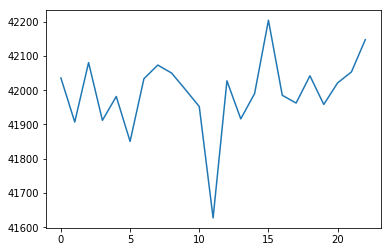

In [7]:
plt.plot(losses_train)
plt.la

In [14]:
with open('model_results.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    [a] = pickle.load(f)                                                                          

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

In [24]:
import numpy.core._multiarray_umath

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

In [1]:
with open('model_results.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    a = pickle.load(f)                                                                          

_predictions_train,_sensitivity_train,_predictions_test,_sensitivity_test,losses_train,losses_test = a

NameError: name 'pickle' is not defined

In [6]:
with open('expression_sensitivity.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    [all_data] = pickle.load(f)

In [4]:
expression = all_data.iloc[:,0:22843]

In [6]:
expression.T.to_csv("expression.csv",sep='\t')

In [24]:
drugs = all_data.iloc[:,22843:]
corr = drugs.corr()

In [91]:
corr

,17-AAG (Tanespimycin),A-674563,ABT-737,AT7519,AZD1480,Afatinib (BIBW-2992),Alisertib (MLN8237),Axitinib (AG-013736),BEZ235,BI-2536,...,VX-745,Vandetanib (ZD6474),Vargetef,Vatalanib (PTK787),Vemurafenib (PLX-4032),Venetoclax,Vismodegib (GDC-0449),Volasertib (BI-6727),XAV-939,YM-155
17-AAG (Tanespimycin),1.000000,0.330411,-0.027159,0.380190,0.360608,0.193722,0.188920,0.569854,0.405204,0.226532,...,0.524969,0.376782,0.340315,0.409248,0.225954,-0.171604,0.036147,0.291845,0.145712,0.220136
A-674563,0.330411,1.000000,0.212033,0.350017,0.374733,0.472234,0.247582,0.303851,0.330896,0.221824,...,0.364187,0.183232,0.467518,0.126842,-0.007876,0.279506,0.039729,0.134900,-0.168366,0.198714
ABT-737,-0.027159,0.212033,1.000000,0.145956,0.038812,-0.013096,-0.139884,-0.170526,0.075152,-0.117646,...,0.030569,-0.191388,-0.043709,-0.035418,-0.125535,0.459539,0.120561,-0.058104,-0.062595,0.241794
AT7519,0.380190,0.350017,0.145956,1.000000,0.210126,0.066802,-0.034334,0.317022,0.378134,0.394804,...,0.243101,0.124549,0.197472,0.147059,0.035161,-0.083321,0.048546,0.100946,-0.068811,0.226857
AZD1480,0.360608,0.374733,0.038812,0.210126,1.000000,0.345202,0.269930,0.499612,0.197476,0.023663,...,0.385342,0.314270,0.258553,0.393994,0.250129,0.022123,0.057040,0.156512,-0.010536,0.198649
Afatinib (BIBW-2992),0.193722,0.472234,-0.013096,0.066802,0.345202,1.000000,0.435569,0.334856,0.242659,0.405420,...,0.330546,0.362436,0.576958,0.198655,0.087922,0.281591,-0.123431,0.330805,0.022363,-0.055982
Alisertib (MLN8237),0.188920,0.247582,-0.139884,-0.034334,0.269930,0.435569,1.000000,0.209411,0.063928,0.180655,...,0.339855,0.397235,0.404227,0.343657,0.293879,0.196081,-0.031272,0.132145,0.204716,-0.000376
Axitinib (AG-013736),0.569854,0.303851,-0.170526,0.317022,0.499612,0.334856,0.209411,1.000000,0.481628,0.374018,...,0.482559,0.393562,0.468964,0.422645,0.260690,-0.024514,0.002363,0.258294,0.119847,0.138622
BEZ235,0.405204,0.330896,0.075152,0.378134,0.197476,0.242659,0.063928,0.481628,1.000000,0.347745,...,0.418447,0.155920,0.312269,0.192609,0.012856,-0.083301,0.036972,0.221339,0.329117,0.162403
BI-2536,0.226532,0.221824,-0.117646,0.394804,0.023663,0.405420,0.180655,0.374018,0.347745,1.000000,...,0.269975,0.102340,0.260617,0.189549,0.196826,NaN,-0.074606,NaN,-0.079082,0.012143


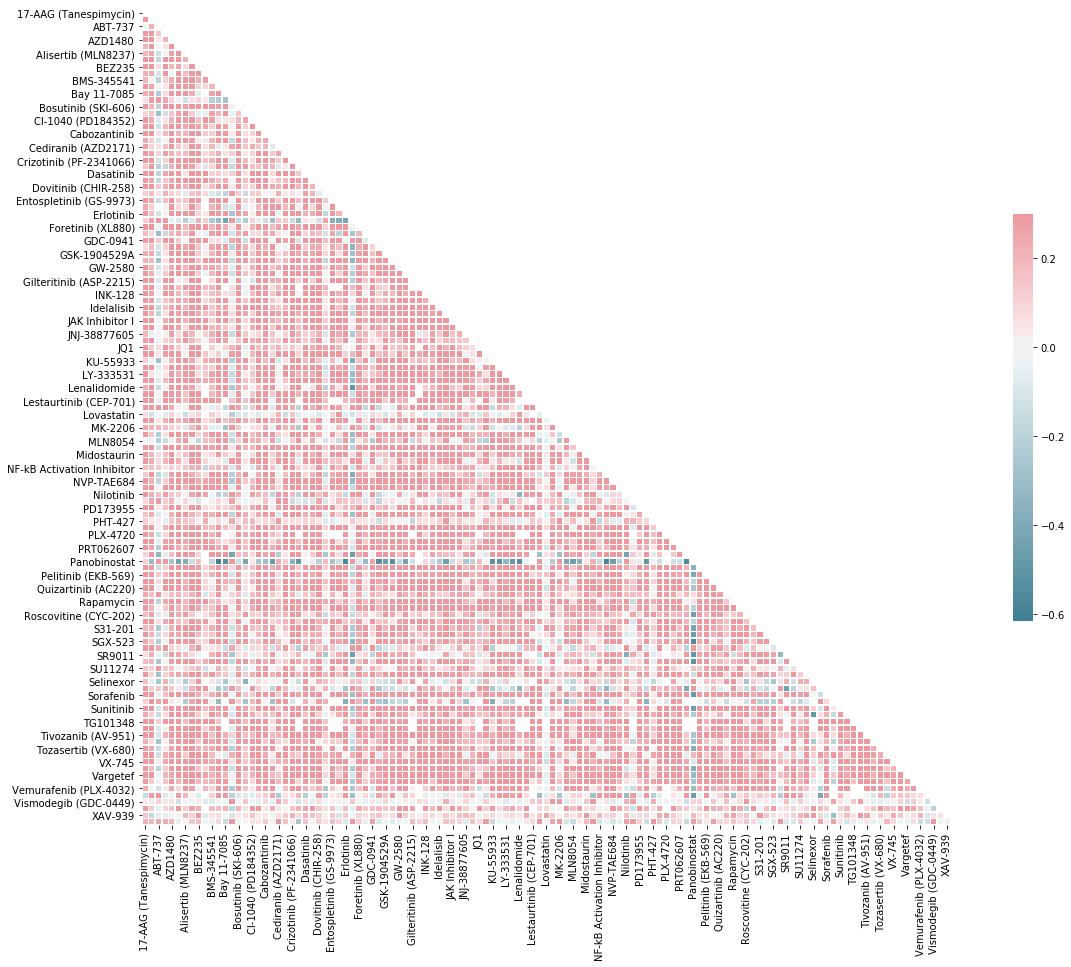

In [25]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [40]:
vals = pd.DataFrame(drug_data.mean()).sort_values(by=0).reset_index()
vals.columns = ['drug','AUC']
least = pd.DataFrame([x for i,x in vals.iterrows() if int(x['AUC']) <  np.percentile(vals['AUC'], 20)])
greatest = pd.DataFrame([x for i,x in vals.iterrows() if int(x['AUC']) >  np.percentile(vals['AUC'], 80)])

In [42]:
greatest

,drug,AUC
99,KU-55933,236.205753
100,GSK-1904529A,236.600818
101,Palbociclib,236.922146
102,JNJ-38877605,237.934992
103,SB-431542,238.501196
104,Gefitinib,239.827009
105,TG100-115,240.144192
106,Lenalidomide,240.741534
107,YM-155,244.356696
108,XAV-939,244.415024


In [68]:
least = drugs[least['drug'].values]
greatest = drugs[greatest['drug'].values]
signif = pd.concat([least,greatest],axis=1)
sig_corr = signif.corr()

In [22]:
with open('drug_corr.pkl', 'wb') as f:
    pickle.dump([sig_corr], f, protocol=2)

In [73]:
with open('drug_corr_full.pkl', 'wb') as f:
    pickle.dump([sig_corr_full], f, protocol=2)

In [85]:
with open('family_gene_dict_red.pkl', 'wb') as f:
    pickle.dump([family_gene_dict_red], f, protocol=2)
    family_gene_dict_red

In [87]:
family_gene_dict_red['AKT']

['A-674563', 'GSK690693', 'MK-2206']

In [89]:
sig_corr_full[sig_corr_full.index.isin(family_gene_dict_red['AKT'])]

,Elesclomol,Panobinostat,SNS-032 (BMS-387032),Selinexor,INK-128,Foretinib (XL880),Flavopiridol,Trametinib (GSK1120212),JQ1,PI-103,...,MLN8054,SR9011,Vemurafenib (PLX-4032),Roscovitine (CYC-202),STO609,Nutlin 3a,PHT-427,CHIR-99021,GDC-0879,Vismodegib (GDC-0449)
A-674563,0.169736,-0.314809,0.313137,-0.055362,0.252408,0.433414,0.264896,0.35276,0.137091,0.290052,...,-0.03722,0.225773,-0.007876,0.269451,0.202879,0.241721,0.030484,0.144369,0.073688,0.039729


In [128]:
import plotly.plotly as py
import plotly.graph_objs as go

trace = go.Heatmap(z=sig_corr,
                   x=sig_corr.columns,
                   y=sig_corr.columns)
data=[trace]
py.iplot(data, filename='labelled-heatmap')

ModuleNotFoundError: No module named 'plotly'

In [37]:
sig_corr.mask(mask,inplace=True)

In [72]:
sig_corr_full

,Elesclomol,Panobinostat,SNS-032 (BMS-387032),Selinexor,INK-128,Foretinib (XL880),Flavopiridol,Trametinib (GSK1120212),JQ1,PI-103,...,MLN8054,SR9011,Vemurafenib (PLX-4032),Roscovitine (CYC-202),STO609,Nutlin 3a,PHT-427,CHIR-99021,GDC-0879,Vismodegib (GDC-0449)
Elesclomol,1.000000,0.179077,0.199862,0.172819,0.125222,0.118955,0.256432,0.202704,0.262424,0.122552,...,-0.113666,-0.254762,-0.243477,-0.151819,-0.089213,-0.101509,-0.079159,-0.153377,-0.125037,-0.012740
Panobinostat,0.179077,1.000000,0.408863,0.318695,0.095797,-0.089245,0.778260,0.186202,0.183231,-0.125203,...,-0.441761,-0.494506,-0.304917,-0.461381,-0.511469,0.049233,-0.009559,-0.426879,-0.320286,0.111418
SNS-032 (BMS-387032),0.199862,0.408863,1.000000,0.064623,0.339172,0.308038,0.465369,0.154365,0.083111,0.333399,...,-0.168519,-0.322455,-0.135992,-0.084712,-0.097568,0.036080,-0.030598,-0.076493,-0.111356,0.020981
Selinexor,0.172819,0.318695,0.064623,1.000000,0.258499,0.155260,0.148605,0.119628,-0.143613,0.015502,...,-0.186832,0.212029,0.026589,-0.264180,-0.126468,0.074496,-0.180161,-0.359624,-0.077537,0.017839
INK-128,0.125222,0.095797,0.339172,0.258499,1.000000,0.540177,0.091468,0.316241,0.341790,0.641699,...,-0.031812,-0.034845,0.133341,0.028165,0.180424,0.061564,0.060328,0.018157,-0.005150,0.073986
Foretinib (XL880),0.118955,-0.089245,0.308038,0.155260,0.540177,1.000000,-0.012125,0.431726,0.349092,0.583582,...,0.041384,0.055155,0.155842,0.112142,0.167224,0.097791,0.060794,0.030170,0.188401,-0.023369
Flavopiridol,0.256432,0.778260,0.465369,0.148605,0.091468,-0.012125,1.000000,0.215487,0.002779,0.038561,...,-0.260902,-0.459823,-0.256225,-0.155984,-0.333783,0.131729,0.127082,-0.229274,-0.267422,0.150749
Trametinib (GSK1120212),0.202704,0.186202,0.154365,0.119628,0.316241,0.431726,0.215487,1.000000,0.410259,0.288571,...,-0.059102,-0.063114,-0.136061,0.089045,0.150174,0.127078,0.254689,0.146347,0.077681,-0.023324
JQ1,0.262424,0.183231,0.083111,-0.143613,0.341790,0.349092,0.002779,0.410259,1.000000,0.316180,...,-0.181722,-0.103228,-0.143146,-0.096396,0.045238,0.035428,0.006417,-0.064072,0.108183,-0.013276
PI-103,0.122552,-0.125203,0.333399,0.015502,0.641699,0.583582,0.038561,0.288571,0.316180,1.000000,...,-0.005151,0.038859,0.260199,0.187121,0.272358,-0.083370,0.135363,0.129535,0.245294,0.023085


In [36]:
# 20% most and least significant AUCs plotted to see drug sensitivity correlations
mask = np.zeros_like(sig_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

In [74]:
sig_corr[sig_corr.index.isin(family_gene_dict['HDAC'])].shape[0]

1

In [83]:
family_gene_dict_red = { k : v for k,v in family_gene_dict.items() if len(v)>2}

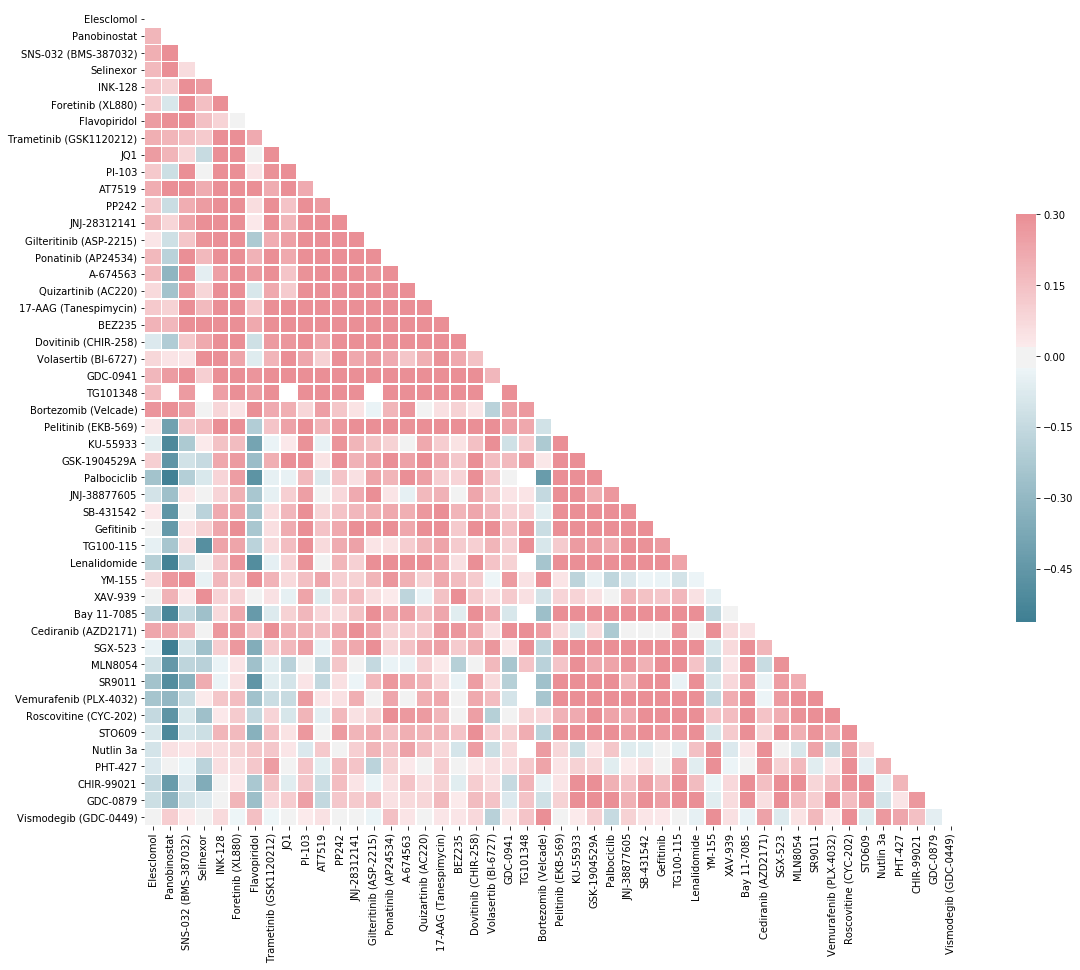

In [13]:
f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(sig_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [83]:
clust = pd.read_csv('/Users/ssreedhar/Documents/school/Research/data/final-membership.txt', sep="\t", header=None)
clust.columns = ["Gene", "Module", "KME"]
clust = clust.iloc[1:,:]

In [84]:
clust_ = clust[clust['Module'] != 'UNCLASSIFIED']

In [89]:
clust_.shape

(1508, 3)

In [96]:
exp = all_data.iloc[:,0:n_feats]

In [6]:
clust = pd.read_csv("/Users/ssreedhar/Documents/school/Research/data/wgcna-membership.txt",sep="\t")


In [7]:
clust.shape

(3853, 3)

In [114]:
all_data

,TSPAN6,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,STPG1,...,VX-745,Vandetanib (ZD6474),Vargetef,Vatalanib (PTK787),Vemurafenib (PLX-4032),Venetoclax,Vismodegib (GDC-0449),Volasertib (BI-6727),XAV-939,YM-155
12-00023,-1.562506,6.886609,3.817626,2.437114,10.131911,1.808987,6.629013,4.506795,6.311961,1.305681,...,250.197553,228.466844,220.016127,260.929018,NaN,NaN,NaN,NaN,NaN,281.582971
12-00051,2.352541,6.438417,3.987133,1.862662,5.014124,0.979265,5.681544,4.660312,4.850069,0.873389,...,212.303770,157.817539,227.797541,206.763063,NaN,NaN,NaN,NaN,NaN,277.755934
12-00066,-2.825696,6.554495,3.207921,3.368360,10.139119,2.148488,6.223989,4.912694,6.290280,1.475002,...,107.130496,204.048488,107.243715,189.469042,NaN,NaN,NaN,NaN,NaN,211.975259
12-00150,1.688537,6.852558,3.878230,3.332284,5.941063,2.953542,6.995513,4.746799,5.320093,2.825116,...,234.260841,171.028575,166.898934,196.513251,NaN,NaN,NaN,NaN,NaN,228.902695
12-00211,-3.272121,6.613863,4.528385,2.984168,7.274613,0.786802,6.506518,5.154787,6.552361,2.044008,...,229.496106,281.448904,266.318413,200.239127,NaN,NaN,272.847735,NaN,223.687277,242.984849
12-00258,-3.561056,7.045231,3.762908,2.964634,10.538451,4.636939,5.673199,4.836415,6.056817,1.873819,...,206.411780,262.574406,278.220515,248.676066,NaN,NaN,286.274000,NaN,272.063465,280.508046
12-00294,-3.287483,7.019496,4.514343,3.479539,8.762846,0.572802,5.732546,4.795887,6.155323,1.619544,...,154.658062,210.225216,116.427819,178.935876,NaN,NaN,286.274000,NaN,218.783591,282.815470
12-00372,-0.149916,6.698076,4.226222,2.549459,8.009340,6.439783,5.799692,4.950827,6.632834,2.013097,...,270.542445,169.149358,165.185803,225.032930,NaN,NaN,286.274000,NaN,259.573474,266.812583
12-00423,-1.232077,6.565889,3.606704,3.011702,8.170395,-0.006187,4.956396,6.032637,6.526853,1.872104,...,146.358784,217.747423,231.833423,180.855129,NaN,NaN,282.197388,NaN,240.427365,234.114163
12-00426,-1.778046,6.553925,4.574380,2.502817,6.420402,0.817944,6.243893,5.017577,7.081726,-0.537617,...,NaN,208.362570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
